### Predict if a mail is spam or not 

**Data Description:** 
    
Refer: https://archive.ics.uci.edu/ml/datasets/spambase for detailed data description

* Number of Observations: 4601 (1813 Spam = 39.4%)
* Number of Attributes: 58 (57 continuous, 1 nominal class label)

** Attributes **

* 48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

* 6 continuous real [0,100] attributes of type char_freq_CHAR] = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

* 1 continuous real [1,...] attribute of type capital_run_length_average  = average length of uninterrupted sequences of capital letters 

* 1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters 

* 1 continuous integer [1,...] attribute of type capital_run_length_total  = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail 

* 1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 



** Logistic Regression **

Logistic regression is a discriminative classifier where Log odds is modelled as a linear function i.e.

\begin{equation}
ln \left( \frac{p\left( y = +1|x \right)}{p \left(y=-1|x \right)} \right) = x^{T}w + w_0
\end{equation}

Hence we get,

\begin{equation}
p \left( y = +1|x \right) = \frac{e^{x^Tw + w_0}}{1 + e^{x^Tw + w_0}} = \sigma (x_i^T w)
\end{equation}

The log likelihood function i.e.

\begin{equation}
\sum_{i=1}^{n} ln \left(\sigma_{i} \left(y_i . w \right) \right)
\end{equation}

is maximized over w using two different optimization algorithms:

1. Steepest Ascent
2. Newton's Method

\begin{equation}
w_{ML} = arg\ \underset{w}{max} \sum_{i=1}^{n} ln \left(\sigma_{i} \left(y_i . w \right) \right)
\end{equation}


** Data used for this implementation is available at [Github Link](https://github.com/anujk3/ml_datasets/tree/master/ml-logistic)**

### Python Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator
#import scipy
from scipy.special import expit
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

X_train = np.genfromtxt('hw2-data/X_train.csv', delimiter=',')
y_train = np.genfromtxt('hw2-data/y_train.csv')

X_test = np.genfromtxt('hw2-data/X_test.csv', delimiter=',')
y_test = np.genfromtxt('hw2-data/y_test.csv')

def append_column_one(data):    
    append_ones = np.ones((data.shape[0],1))
    data = np.hstack((append_ones, data))
    return data

X_train = append_column_one(X_train)
X_test = append_column_one(X_test)
np.place(y_train, y_train == 0, -1)
np.place(y_test, y_test == 0, -1)

In [2]:
def calculate_sigmoid(x):
    return expit(x)

In [3]:
def calculate_update(X_train, y_train, weights, sigmoid_iter):
    update = np.zeros(len(weights))
    for i in range(0, X_train.shape[0]):
        update += y_train[i] * (1 - sigmoid_iter[i]) * X_train[i]
    return update

In [4]:
def calculate_objectiveFunc(X_train, y_train, weights):
    output = 0
    sigmoid_iter = []
    for i in range(0, X_train.shape[0]):
        sigmoid_value = calculate_sigmoid(y_train[i] * np.dot(X_train[i], weights))
        sigmoid_iter.append(sigmoid_value)
        output += np.log(sigmoid_value)
    return output, sigmoid_iter

In [5]:
objective_value = []
w = np.zeros(X_train.shape[1])
for t in range(1, 10001):
    #print "Iteration ", t
    learning_rate = 1.0 / (np.power(10, 5)*np.sqrt(t + 1))
    iter_objectiveVal, sigmoid_iter = calculate_objectiveFunc(X_train, y_train, w)
    objective_value.append(iter_objectiveVal)
    #print iter_objectiveVal
    w = w + (learning_rate * calculate_update(X_train, y_train, w, sigmoid_iter))

### Logistic Regression objective training function L per iteration for t = 1, 2, ..., 10000

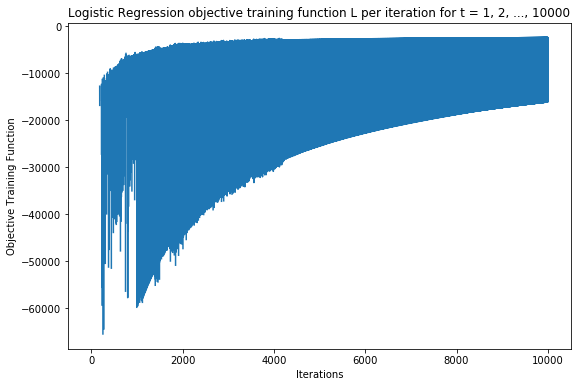

In [6]:
plt.figure(figsize=(9, 6))
plt.plot(objective_value)
plt.xlabel("Iterations")
plt.ylabel("Objective Training Function")
plt.title("Logistic Regression objective training function L per iteration for t = 1, 2, ..., 10000")
plt.show()

---

## Logistic Regression : Newton's Method (Optimization)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import operator
#import scipy
from scipy.special import expit
%matplotlib inline

X_train = np.genfromtxt('hw2-data/X_train.csv', delimiter=',')
y_train = np.genfromtxt('hw2-data/y_train.csv')

X_test = np.genfromtxt('hw2-data/X_test.csv', delimiter=',')
y_test = np.genfromtxt('hw2-data/y_test.csv')

def append_column_one(data):    
    append_ones = np.ones((data.shape[0],1))
    data = np.hstack((append_ones, data))
    return data

X_train = append_column_one(X_train)
#print X_train.shape
X_test = append_column_one(X_test)
np.place(y_train, y_train == 0, -1)
np.place(y_test, y_test == 0, -1)

In [17]:
def calculate_deltaupdate(X_train, y_train, weights):
    update = np.zeros(len(weights))
    for i in range(0, X_train.shape[0]):
        update = update + y_train[i] * (1 - calculate_sigmoid(y_train[i] * np.dot(X_train[i], weights))) * X_train[i]
    return update

In [18]:
def calc_squareinvupdate(X_train, y_train, weights):
    output_matrix = np.zeros((len(weights), len(weights)))
    for i in range(0, X_train.shape[0]):
        sig_value =  calculate_sigmoid(np.dot(X_train[i], weights))
        output_matrix += sig_value * (1 - sig_value) * np.outer(X_train[i], X_train[i])
    return np.linalg.inv(-output_matrix)

In [19]:
def calculate_objectiveFunc(X_train, y_train, weights):
    output = 0
    for i in range(0, X_train.shape[0]):
        output += np.log(calculate_sigmoid(y_train[i] * np.dot(X_train[i], weights)))
    return output

In [20]:
objective_value = []
w = np.zeros(X_train.shape[1])
#print len(w)
for t in range(1, 101):
    #print "Iteration ", t
    learning_rate = 1.0/(np.sqrt(t + 1))
    #print "Objective function value ", calculate_objectiveFunc(X_train, y_train, w)
    objective_value.append(calculate_objectiveFunc(X_train, y_train, w))
    w = w - (learning_rate * np.dot(calc_squareinvupdate(X_train, y_train, w), 
                                    calculate_deltaupdate(X_train, y_train, w)))

### Objective Function L on training data as a function of t = 1, 2, ... , 100

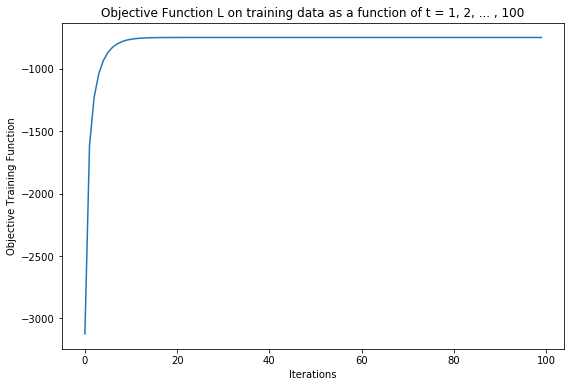

In [21]:
plt.figure(figsize=(9, 6))
plt.plot(objective_value)
plt.xlabel("Iterations")
plt.ylabel("Objective Training Function")
plt.title("Objective Function L on training data as a function of t = 1, 2, ... , 100")
plt.show()

In [22]:
def predict_test_data(X_test, weights):
    predicted_test = []
    for i in range(0, len(X_test)):
        output = calculate_sigmoid(np.dot(X_test[i], weights))
        if output > 0.5:
            predicted_test.append(1)
        else:
            predicted_test.append(-1)
    return predicted_test

In [23]:
predictions = predict_test_data(X_test, w)

In [29]:
def prediction_accuracy(predicted_labels, original_labels):
    count = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == original_labels[i]:
            count += 1
    #print count, len(predicted_labels)
    return float(count)/len(predicted_labels)

In [30]:
print("Prediction accuracy is {}".format(prediction_accuracy(y_test, predictions)))

Prediction accuracy is 0.9139784946236559


### Prediction Accuracy on testing data is 0.91397 or 91.397% 
---